In [2]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (24, 16)
# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam_v2
import keras.backend as K
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.utils.np_utils import to_categorical

In [4]:
df = pd.read_csv('/Users/smuel/Documents/Louie7/Developer/Data/data.csv')

In [8]:
df.Position.head()

0     RF
1     ST
2     LW
3     GK
4    RCM
Name: Position, dtype: object

In [9]:
# Remove Missing Values 
na = pd.notnull(df["Position"])
df = df[na]

In [10]:
df = df[["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

In [11]:
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]
# categorize the position in this step.
df.loc[df["Position"] == "GK", "Position"] = 0
df.loc[df["Position"].isin(defender_player), "Position"] = 1
df.loc[df["Position"].isin(midfielder_player), "Position"] = 2
df.loc[df["Position"].isin(forward_player), "Position"] = 3

In [12]:
df.Position.head()

0    3
1    3
2    3
3    0
4    2
Name: Position, dtype: object

In [101]:
x = df.drop("Position", axis = 1)

In [103]:
x.head(5)

,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [104]:
#Standard Scaling of features:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
y = df["Position"]

In [105]:
x.head(5)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,2.532391,1.018293,2.130190,2.434969,2.201010,2.491028,2.925359,2.236808,2.255005,1.767403,...,1.684657,3.265669,-0.717896,-0.909470,-0.923850,-0.599889,-0.318983,-0.074713,-0.140266,-0.485159
1,2.481180,2.111424,1.517765,2.491481,1.725114,1.838695,1.895584,1.584271,2.135138,1.633444,...,2.321491,3.178232,-0.969153,-0.770985,-1.064778,-0.543386,-0.318983,-0.074713,-0.140266,-0.318094
2,2.122700,0.558028,1.721906,2.321945,2.148132,2.219223,2.524891,1.649524,2.195072,1.968342,...,2.066757,3.090795,-1.019405,-1.094116,-0.595016,-0.430379,-0.437259,-0.074713,-0.081569,-0.318094
3,-1.666942,-1.800833,-0.591700,-1.690394,-1.976298,-1.422972,-1.365369,-0.112327,-0.981399,-0.509905,...,-0.544262,0.817436,-1.622423,-1.232601,-1.534540,4.146377,4.057254,4.287959,4.203333,4.304052
4,1.866643,0.155296,2.266284,2.208922,1.619359,2.056139,2.296052,2.497823,1.955338,0.896668,...,1.939390,2.566174,1.040907,0.475378,0.250555,-0.091360,-0.200706,-0.680640,-0.375055,-0.206717


In [17]:
y

0        3
1        3
2        3
3        0
4        2
        ..
18202    2
18203    3
18204    3
18205    3
18206    2
Name: Position, Length: 18147, dtype: object

In [18]:
# convert position into binary vector
y_cat = to_categorical(y)

In [19]:
y_cat

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x.values, y_cat, test_size=0.2, random_state=42)

In [22]:
from keras.layers import Dropout

In [24]:
# create and compile model
model = Sequential()
model.add(Dense(60, input_shape = (33,), activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "softmax"))
model.compile(optimizer=adam_v2.Adam(learning_rate = 0.01), loss="categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 60)                2040      
_________________________________________________________________
dense_6 (Dense)              (None, 15)                915       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 64        
Total params: 3,019
Trainable params: 3,019
Non-trainable params: 0
_________________________________________________________________


In [36]:
h = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=10)

Epoch 1/10
454/454 [==============================] - 1s 2ms/step - loss: 0.3186 - accuracy: 0.8708 - val_loss: 0.2999 - val_accuracy: 0.8755
Epoch 2/10
454/454 [==============================] - 1s 1ms/step - loss: 0.3033 - accuracy: 0.8759 - val_loss: 0.2983 - val_accuracy: 0.8824
Epoch 3/10
454/454 [==============================] - 1s 1ms/step - loss: 0.2981 - accuracy: 0.8756 - val_loss: 0.3078 - val_accuracy: 0.8777
Epoch 4/10
454/454 [==============================] - 1s 2ms/step - loss: 0.3020 - accuracy: 0.8759 - val_loss: 0.3033 - val_accuracy: 0.8766
Epoch 5/10
454/454 [==============================] - 1s 1ms/step - loss: 0.2938 - accuracy: 0.8812 - val_loss: 0.3131 - val_accuracy: 0.8810
Epoch 6/10
454/454 [==============================] - 1s 1ms/step - loss: 0.2939 - accuracy: 0.8799 - val_loss: 0.3147 - val_accuracy: 0.8686
Epoch 7/10
454/454 [==============================] - 1s 1ms/step - loss: 0.2951 - accuracy: 0.8784 - val_loss: 0.3149 - val_accuracy: 0.8727
Epoch 

In [52]:
y0_pred = model.predict(X_test)
y_pred = np.argmax(y0_pred, axis=1)

In [53]:
y_pred

array([2, 2, 3, ..., 0, 2, 1])

In [55]:
y0_test = y_test
y_test = np.argmax(y0_test, axis=1)

[]

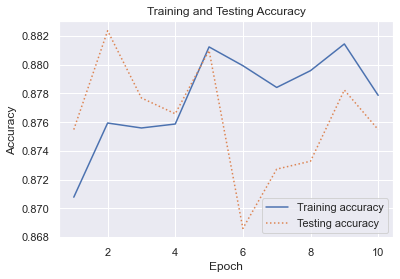

In [42]:
%matplotlib inline
sns.set()
acc = h.history['accuracy']
val = h.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Text(89.133125, 0.5, 'Actual label')

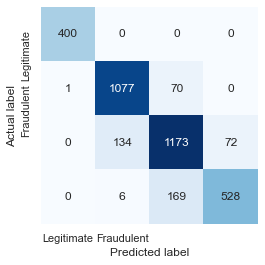

In [56]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
labels = ['Legitimate', 'Fraudulent']
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

### Random forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [76]:
y0 = y.fillna(0)

In [81]:
x0 = x.replace("unknown", 0.0).fillna(0.0)

In [82]:
type(x0)

pandas.core.frame.DataFrame

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x0.values, y0, test_size=0.2, random_state=42)

In [70]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [84]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
h0 = rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [86]:
h0.best_estimator_

<bound method BaseSearchCV.score of RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)>

In [88]:
predictions = h0.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

In [89]:
accuracy

0.884573002754821

In [90]:
conf_matrix = confusion_matrix(y_test, predictions)

In [91]:
conf_matrix

array([[ 407,    0,    0,    0],
       [   0, 1074,   83,    0],
       [   0,   97, 1194,   95],
       [   0,    0,  144,  536]])